In [1]:
import cv2
import torch
import numpy as np
from PIL import Image
from model import GEN_DEEP
from torchvision import transforms
from torchvision.utils import make_grid


import matplotlib.pyplot as plt
%matplotlib inline


def get_image_by_path(img_path, img_transform, target_size=None, device='cuda'):
    img = Image.open(img_path)
    if target_size is not None:
        img = img.resize(target_size, resample=Image.BICUBIC)
    return img_transform(img).unsqueeze(0).to(device)


def get_image_from_output(img_tensor):
    img_tensor = img_tensor.squeeze(0)
    grid = make_grid(img_tensor, normalize=True)
    # Add 0.5 after unnormalizing to [0, 255] to round to nearest integer
    img = grid.mul_(255).add_(0.5).clamp_(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()
    return img


img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


device = 'cuda'
net_G_low2high = GEN_DEEP()
net_G_low2high.load_state_dict(torch.load('model.pkl'))
net_G_low2high = net_G_low2high.to(device)
net_G_low2high.eval();

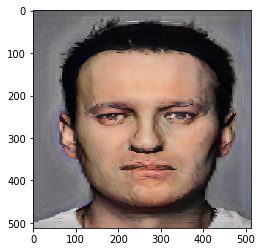

In [2]:
img_path = './sample.jpg'
img_tensor = get_image_by_path(img_path, img_transform, (128, 128), device)

out = net_G_low2high(img_tensor).detach().cpu()
out_image = get_image_from_output(out)
plt.imshow(out_image)
plt.show()

In [3]:
cv2.imwrite('out.jpg', cv2.cvtColor(out_image, cv2.COLOR_RGB2BGR))

True